In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/aog_pressure_sensors (1).csv')

In [ ]:
data.head()

,sensor_id,sensor
0,1,0.1062
1,2,0.3142
2,3,0.5086
3,4,0.9412
4,5,0.2801


In [ ]:
corrosive_sensors = data['sensor'] < 0.06
corrosive_sensors

0      False
1      False
2      False
3      False
4      False
       ...  
994    False
995    False
996    False
997    False
998     True
Name: sensor, Length: 999, dtype: bool

In [ ]:
data[corrosive_sensors]

,sensor_id,sensor
33,34,0.0292
42,43,0.0509
64,65,0.0062
70,71,0.0540
80,81,0.0038
81,82,0.0162
82,83,0.0108
83,84,0.0380
84,85,0.0562
90,91,0.0591


In [ ]:
data['sensor_status'] = data['sensor'].apply(lambda x: 'corrosive' if x < 0.06 else 'not corrosive')


In [ ]:
data['sensor_status'].head(10)


0    not corrosive
1    not corrosive
2    not corrosive
3    not corrosive
4    not corrosive
5    not corrosive
6    not corrosive
7    not corrosive
8    not corrosive
9    not corrosive
Name: sensor_status, dtype: object

In [ ]:
data.head()

,sensor_id,sensor,sensor_status
0,1,0.1062,not corrosive
1,2,0.3142,not corrosive
2,3,0.5086,not corrosive
3,4,0.9412,not corrosive
4,5,0.2801,not corrosive


In [ ]:
data.drop("sensor_status",axis = 1)

,sensor_id,sensor
0,1,0.1062
1,2,0.3142
2,3,0.5086
3,4,0.9412
4,5,0.2801
...,...,...
994,995,0.1417
995,996,0.1142
996,997,0.6571
997,998,0.5224


In [ ]:
data.loc[data['sensor'] < 0.06, 'corrosion'] = 'corrosive' 
data.loc[data['sensor'] > 0.06, 'corrosion'] = 'not corrosive' 

In [ ]:
data.tail()

,sensor_id,sensor,sensor_status,corrosion
994,995,0.1417,not corrosive,not corrosive
995,996,0.1142,not corrosive,not corrosive
996,997,0.6571,not corrosive,not corrosive
997,998,0.5224,not corrosive,not corrosive
998,999,0.0541,corrosive,corrosive


In [ ]:
data.head()

,sensor_id,sensor,sensor_status,corrosion
0,1,0.1062,not corrosive,not corrosive
1,2,0.3142,not corrosive,not corrosive
2,3,0.5086,not corrosive,not corrosive
3,4,0.9412,not corrosive,not corrosive
4,5,0.2801,not corrosive,not corrosive


In [ ]:
data.head()

,sensor_id,sensor,sensor_status,corrosion
0,1,0.1062,not corrosive,not corrosive
1,2,0.3142,not corrosive,not corrosive
2,3,0.5086,not corrosive,not corrosive
3,4,0.9412,not corrosive,not corrosive
4,5,0.2801,not corrosive,not corrosive


In [ ]:
data.loc[data['sensor'] > 0.2, 'warning system'] = 'okay' 
data.loc[data['sensor'] < 0.2, 'warning system'] = 'caution' 
data.loc[data['sensor'] < 0.15, 'warning system'] = 'at risk' 
data.loc[data['sensor'] < 0.1, 'warning system'] = 'critical' 

In [ ]:
data.head()

,sensor_id,sensor,sensor_status,corrosion,warning system
0,1,0.1062,not corrosive,not corrosive,at risk
1,2,0.3142,not corrosive,not corrosive,okay
2,3,0.5086,not corrosive,not corrosive,okay
3,4,0.9412,not corrosive,not corrosive,okay
4,5,0.2801,not corrosive,not corrosive,okay


In [ ]:
print(data['warning system'].value_counts())

okay        794
critical     94
caution      57
at risk      54
Name: warning system, dtype: int64


In [ ]:
ws_group = data.groupby('warning system')
ws_group

In [ ]:
ws_group.get_group('okay')

,sensor_id,sensor,sensor_status,corrosion,warning system
1,2,0.3142,not corrosive,not corrosive,okay
2,3,0.5086,not corrosive,not corrosive,okay
3,4,0.9412,not corrosive,not corrosive,okay
4,5,0.2801,not corrosive,not corrosive,okay
5,6,0.9129,not corrosive,not corrosive,okay
...,...,...,...,...,...
991,992,0.3623,not corrosive,not corrosive,okay
992,993,0.5795,not corrosive,not corrosive,okay
993,994,0.8040,not corrosive,not corrosive,okay
996,997,0.6571,not corrosive,not corrosive,okay


In [ ]:
ws_group.size()

warning system
at risk      54
caution      57
critical     94
okay        794
dtype: int64

In [ ]:
sensor_group = data.groupby('sensor_status')

In [ ]:
sensor_group.get_group('corrosive')

,sensor_id,sensor,sensor_status,corrosion,warning system
33,34,0.0292,corrosive,corrosive,critical
42,43,0.0509,corrosive,corrosive,critical
64,65,0.0062,corrosive,corrosive,critical
70,71,0.0540,corrosive,corrosive,critical
80,81,0.0038,corrosive,corrosive,critical
81,82,0.0162,corrosive,corrosive,critical
82,83,0.0108,corrosive,corrosive,critical
83,84,0.0380,corrosive,corrosive,critical
84,85,0.0562,corrosive,corrosive,critical
90,91,0.0591,corrosive,corrosive,critical


In [ ]:
sensor_group.size()

sensor_status
corrosive         58
not corrosive    941
dtype: int64

In [ ]:
data.groupby('warning system')['sensor'].mean()

warning system
at risk     0.127356
caution     0.177574
critical    0.049668
okay        0.599367
Name: sensor, dtype: float64

In [ ]:
import numpy as np

data.pivot_table(values='sensor_id', index ='warning system', aggfunc='count')

,sensor_id
warning system,
at risk,54
caution,57
critical,94
okay,794


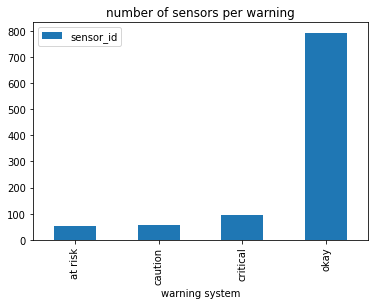

In [ ]:
number_of_sensors = data.pivot_table(values='sensor_id', index ='warning system', aggfunc='count')

max_val = number_of_sensors["sensor_id"].max() +50
number_of_sensors.plot(kind='bar', title='number of sensors per warning', xlim=(0,max_val),legend=True)

In [ ]:
data.pivot_table(['sensor_id','sensor'],'sensor_status',aggfunc=[np.mean,np.min,np.max],margins=True)

mean                amin              amax          
                 sensor   sensor_id  sensor sensor_id  sensor sensor_id
sensor_status                                                          
corrosive      0.030819  456.586207  0.0010        34  0.0591       999
not corrosive  0.526862  502.675877  0.0627         1  0.9998       998
All            0.498063  500.000000  0.0010         1  0.9998       999

In [ ]:
data['new'] = data['sensor_id']+data['sensor']

In [ ]:
data.head()

,sensor_id,sensor,sensor_status,corrosion,warning system,new
0,1,0.1062,not corrosive,not corrosive,at risk,1.1062
1,2,0.3142,not corrosive,not corrosive,okay,2.3142
2,3,0.5086,not corrosive,not corrosive,okay,3.5086
3,4,0.9412,not corrosive,not corrosive,okay,4.9412
4,5,0.2801,not corrosive,not corrosive,okay,5.2801


In [ ]:
data= data.drop("new",axis=1)

In [ ]:
data.head()

,sensor_id,sensor,sensor_status,corrosion,warning system
0,1,0.1062,not corrosive,not corrosive,at risk
1,2,0.3142,not corrosive,not corrosive,okay
2,3,0.5086,not corrosive,not corrosive,okay
3,4,0.9412,not corrosive,not corrosive,okay
4,5,0.2801,not corrosive,not corrosive,okay


In [ ]:
data = data.drop('corrosion',axis =1)

In [ ]:
data.head()

,sensor_id,sensor,sensor_status,warning system
0,1,0.1062,not corrosive,at risk
1,2,0.3142,not corrosive,okay
2,3,0.5086,not corrosive,okay
3,4,0.9412,not corrosive,okay
4,5,0.2801,not corrosive,okay


In [ ]:
df1 =pd.DataFrame({'item':['A','B','C','D'],
                   'value':['5','1','4','7']
})
df2 =pd.DataFrame({'item':['E','F','G','H'],
                   'value':['1','5','9','8']
})
print(df1)

  item value
0    A     5
1    B     1
2    C     4
3    D     7


In [ ]:
pd.concat([df1,df2]).reset_index()

,index,item,value
0,0,A,5
1,1,B,1
2,2,C,4
3,3,D,7
4,0,E,1
5,1,F,5
6,2,G,9
7,3,H,8


In [ ]:
test = ['A','B','A','A','C','A','B']

count = dict()

for i in test:
    if i not in count:
        count[i] = 1
    else:
        count[i] = count[i] + 1
        
print(count)

{'A': 4, 'B': 2, 'C': 1}
